In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Libreria Regex para buscar patrones
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df_aerolinea_limpio = pd.read_csv("aerolinea_limpio.csv", index_col = None)

In [3]:
df_aerolinea_visual = df_aerolinea_limpio.copy()
df_aerolinea_visual.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2017,7
1,100018,2017,2,2,2,4,1320,132,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2017,7
2,100018,2018,10,6,4,10,3110,311,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2017,7
3,100018,2017,4,4,0,4,924,92,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2017,7
4,100018,2017,5,0,0,0,0,0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2017,7


**Fase 2: Visualización**

Usando las herramientas de visualización que has aprendido durante este módulo,
contesta a las siguientes preguntas usando el tipo de gráfica que consideres más
adecuado (podéis ponerle fantasía a las gráficas ;-) ):

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [11]:
cantidad_vuelos = df_aerolinea_visual.groupby("Month")["Flights Booked"].sum().reset_index()
cantidad_vuelos

,Month,Flights Booked
0,1,96936
1,2,96334
2,3,131199
3,4,112511
4,5,142170
5,6,173242
6,7,193431
7,8,169204
8,9,136379
9,10,129461


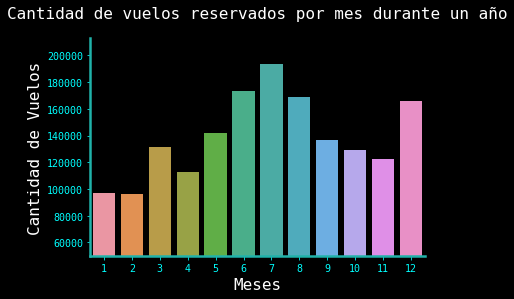

In [17]:
plt.rcParams['font.family'] = 'DejaVu Sans Mono'  
mar_palette = ["mediumseagreen", "lightseagreen", "cadetblue", "steelblue", "cyan"]
sns.set_palette(mar_palette)

fig, ax = plt.subplots()
fig.patch.set_facecolor('black')
ax.set_facecolor('black') 

sns.barplot(x="Month", y="Flights Booked", data=cantidad_vuelos, ax=ax)

ax.set_ylim(bottom=50000)
ax.set_ylim(top=cantidad_vuelos["Flights Booked"].max() * 1.1)

ax.set_xlabel("Meses", fontsize=16, color='white')
ax.set_ylabel("Cantidad de Vuelos", fontsize=16, color='white')

ax.spines['top'].set_visible(False)      
ax.spines['right'].set_visible(False)   
ax.spines['left'].set_linewidth(2.5)  
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_color('lightseagreen')
ax.spines['bottom'].set_color('lightseagreen')


ax.tick_params(axis='x', colors='cyan') 
ax.tick_params(axis='y', colors='cyan')

ax.set_title('Cantidad de vuelos reservados por mes durante un año', fontsize=16, color='white', pad=20)

plt.show()

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

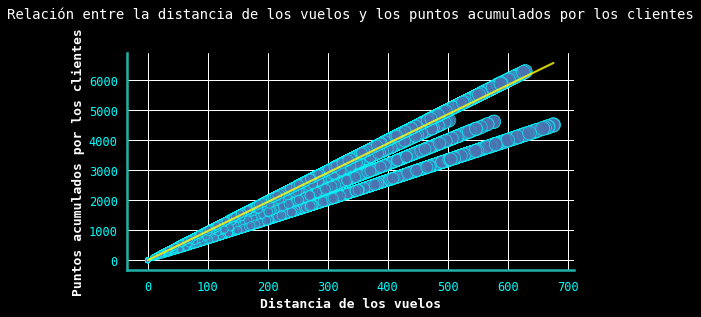

In [23]:

sns.set(style="darkgrid")
plt.rcParams['font.family'] = 'DejaVu Sans Mono'

fig, ax = plt.subplots(figsize=(8, 4))
fig.patch.set_facecolor('black')

scatter = sns.scatterplot(
    x="Points Accumulated",
    y="Distance",
    size="Points Accumulated",           
    sizes=(20, 200),                                
    palette=["mediumseagreen", "lightseagreen", "cadetblue", "steelblue", "cyan"],
    alpha=0.7,                          
    edgecolor="aqua",                
    linewidth=0.8,                    
    data=df_aerolinea_visual,
    ax=ax,
    legend=False                          
)

sns.regplot(
    x='Points Accumulated', 
    y='Distance', 
    scatter=False, 
    color='yellow', 
    line_kws={"linewidth": 2, 'alpha': 0.8},
    data=df_aerolinea_visual,
    ax=ax
)

ax.set_xlabel("Distancia de los vuelos", fontsize=13, color='white', weight='bold')
ax.set_ylabel("Puntos acumulados por los clientes", fontsize=13, color='white', weight='bold')

ax.set_facecolor('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_color('lightseagreen')
ax.spines['bottom'].set_color('lightseagreen')

ax.tick_params(axis='x', colors='cyan', labelsize=12)
ax.tick_params(axis='y', colors='cyan', labelsize=12)


plt.title('Relación entre la distancia de los vuelos y los puntos acumulados por los clientes', fontsize=14, color='white', pad=35)

plt.show()

3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [47]:
distribucion_clientes = df_aerolinea_visual.groupby("Province")["Loyalty Number"].count().reset_index()

distribucion_clientes.head()

,Province,Loyalty Number
0,Alberta,23400
1,British Columbia,106848
2,Manitoba,15984
3,New Brunswick,15432
4,Newfoundland,6312


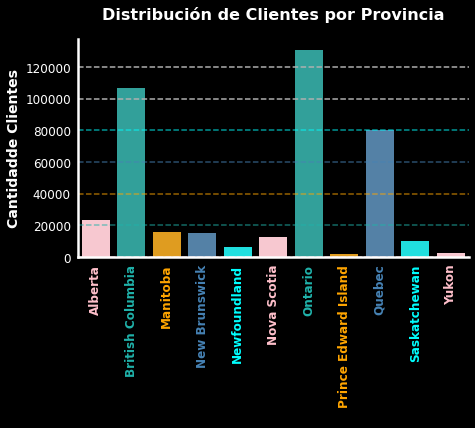

In [53]:
colores = ["pink", "lightseagreen", "orange", "steelblue", "cyan"]

fig, ax = plt.subplots(figsize=(7, 4))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

sns.barplot(x="Province", y="Loyalty Number", data=distribucion_clientes, palette=colores, ax=ax)

plt.xticks(rotation=90)

for i, label in enumerate(ax.get_xticklabels()):
    label.set_color(colores[i % len(colores)])  
    label.set_fontsize(12)
    label.set_weight('bold')

for tick in ax.get_yticklabels():
    tick.set_color('white')
    tick.set_fontsize(12)

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_color('white')   
ax.spines['bottom'].set_color('white') 

ax.grid(True, axis='y', linestyle='--', linewidth=1.5)
gridlines = ax.get_ygridlines()
for i, line in enumerate(gridlines):
    if i < len(colores): 
        line.set_color(colores[i % len(colores)])  
        line.set_alpha(0.6)

plt.ylabel('Cantidadde Clientes', fontsize=14, color='white', weight='bold')
plt.title('Distribución de Clientes por Provincia', fontsize=16, color='white', weight='bold', pad=20)

plt.show()


4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de
los clientes?


In [34]:
salario_educacion = df_aerolinea_visual.groupby("Education")["Salary"].mean().reset_index()
salario_educacion.head()

,Education,Salary
0,Bachelor,72476.211860
1,College,79268.830000
2,Doctor,178335.439516
3,High School or Below,60986.544192
4,Master,103767.494163


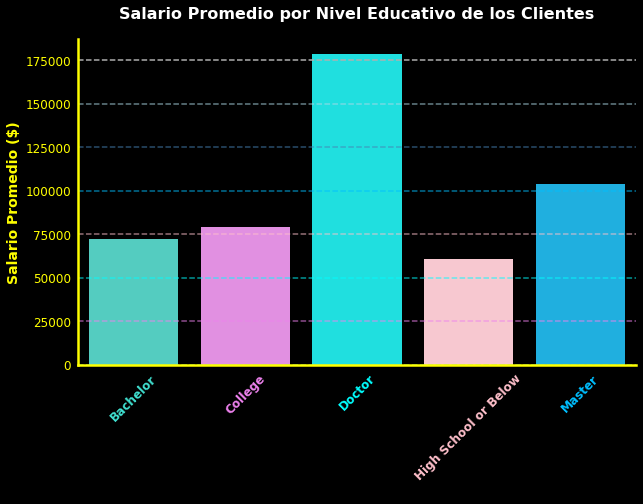

In [44]:
colores = ['turquoise', 'violet', 'cyan', 'pink', 'deepskyblue', 'steelblue', 'lightblue']

fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Crear el gráfico de barras
sns.barplot(x="Education", y="Salary", data=salario_educacion, palette=colores, ax=ax)

plt.xticks(rotation=45)

for i, label in enumerate(ax.get_xticklabels()):
    label.set_color(colores[i % len(colores)])  
    label.set_fontsize(12)
    label.set_weight('bold')

for tick in ax.get_yticklabels():
    tick.set_color('yellow')
    tick.set_fontsize(12)

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_color('yellow')   
ax.spines['bottom'].set_color('yellow') 

ax.grid(True, axis='y', linestyle='--', linewidth=1.5)
gridlines = ax.get_ygridlines()
for i, line in enumerate(gridlines):
    if i < len(colores): 
        line.set_color(colores[i % len(colores)])  
        line.set_alpha(0.6)

plt.ylabel('Salario Promedio ($)', fontsize=14, color='yellow', weight='bold')
plt.title('Salario Promedio por Nivel Educativo de los Clientes', fontsize=16, color='white', weight='bold', pad=20)

plt.show()

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [24]:
clientes_tarjeta_fidelidad = df_aerolinea_visual.groupby("Loyalty Card")["Loyalty Number"].count().reset_index()
clientes_tarjeta_fidelidad.head()

,Loyalty Card,Loyalty Number
0,Aurora,83832
1,Nova,137568
2,Star,184224


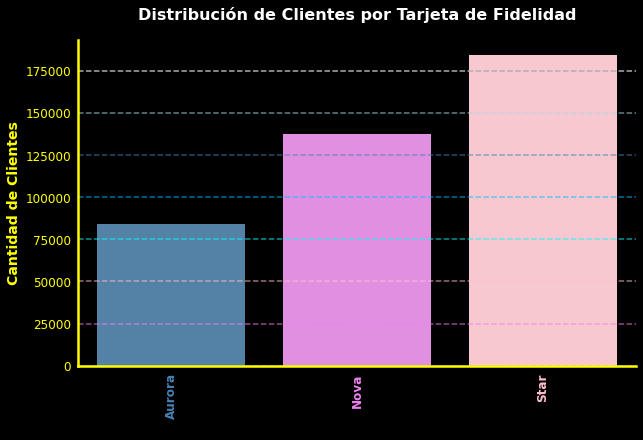

In [31]:
colores = ['steelblue', 'violet', 'pink', 'cyan', 'deepskyblue', 'steelblue', 'lightblue']

fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

sns.barplot(x="Loyalty Card", y="Loyalty Number", data=clientes_tarjeta_fidelidad, palette=colores, ax=ax)

plt.xticks(rotation=90)

for i, label in enumerate(ax.get_xticklabels()):
    label.set_color(colores[i % len(colores)])  
    label.set_fontsize(12)
    label.set_weight('bold')

for tick in ax.get_yticklabels():
    tick.set_color('yellow')
    tick.set_fontsize(12)

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_color('yellow')   
ax.spines['bottom'].set_color('yellow') 

ax.grid(True, axis='y', linestyle='--', linewidth=1.5)
gridlines = ax.get_ygridlines()
for i, line in enumerate(gridlines):
    if i < len(colores): 
        line.set_color(colores[i % len(colores)])  
        line.set_alpha(0.6)

plt.ylabel('Cantidad de Clientes', fontsize=14, color='yellow', weight='bold')
plt.title('Distribución de Clientes por Tarjeta de Fidelidad', fontsize=16, color='white', weight='bold', pad=20)

plt.show()


6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [11]:
clientes_estado_genero = df_aerolinea_visual.groupby(["Marital Status","Gender"])["Loyalty Number"].count().reset_index()
clientes_estado_genero.head()

,Marital Status,Gender,Loyalty Number
0,Divorced,Female,30888
1,Divorced,Male,30288
2,Married,Female,117816
3,Married,Male,117984
4,Single,Female,54936


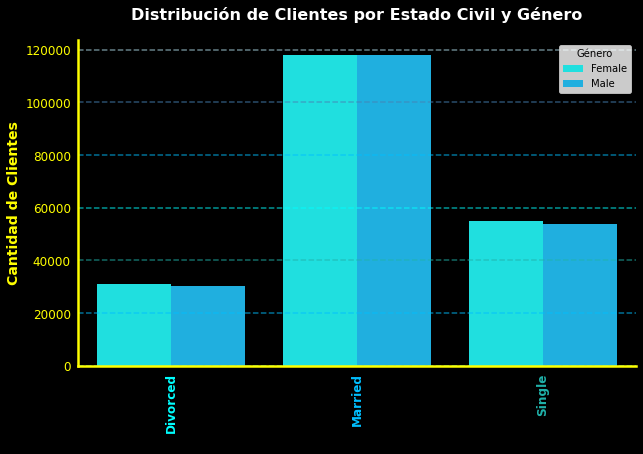

In [33]:
colores = ['aqua', 'deepskyblue', 'lightseagreen', 'cyan', 'deepskyblue', 'steelblue', 'lightblue']

fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

sns.barplot(x="Marital Status", y="Count", hue="Gender", data=clientes_estado_genero, palette=colores, ax=ax)

# Ajustar el diseño del gráfico
plt.xticks(rotation=90)

for i, label in enumerate(ax.get_xticklabels()):
    label.set_color(colores[i % len(colores)])  
    label.set_fontsize(12)
    label.set_weight('bold')

for tick in ax.get_yticklabels():
    tick.set_color('yellow')
    tick.set_fontsize(12)

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_color('yellow')   
ax.spines['bottom'].set_color('yellow') 

ax.grid(True, axis='y', linestyle='--', linewidth=1.5)
gridlines = ax.get_ygridlines()
for i, line in enumerate(gridlines):
    if i < len(colores): 
        line.set_color(colores[i % len(colores)])  
        line.set_alpha(0.6)

plt.ylabel('Cantidad de Clientes', fontsize=14, color='yellow', weight='bold')
plt.title('Distribución de Clientes por Estado Civil y Género', fontsize=16, color='white', weight='bold', pad=20)

# Mostrar el gráfico
plt.legend(title="Género", loc='upper right', fontsize=10)
plt.show()